###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [92]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
import pandas as pd

clg1 = pd.read_csv("/content/drive/MyDrive/Copy of college_1.csv")
clg2 = pd.read_csv("/content/drive/MyDrive/Copy of college_2.csv")

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [94]:
df = pd.concat([clg1, clg2])
df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [95]:
ExcExp = df[df['CodeKata Score'] > 15000]
ExcExp.to_csv('Exceeded_expectations.csv', index = False)


In [96]:
RchdExp = df[((df['CodeKata Score'] <= 15000) & (df['CodeKata Score'] > 10000))]
RchdExp.to_csv('Reached_expectations.csv', index = False)

In [97]:
NdImp = df[((df['CodeKata Score'] <= 10000) & (df['CodeKata Score'] > 7000))]
NdImp.to_csv('Needs_Improvement.csv', index = False)

In [98]:
UnSat = df[df['CodeKata Score'] <= 7000]
UnSat.to_csv('Needs_Improvement.csv', index = False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [99]:
df[['Previous Geekions', 'CodeKata Score']].mean(axis = 1)

0     24500.0
1     21740.0
2     19680.0
3     10610.0
4      8980.0
       ...   
30     2380.0
31     1890.0
32     1720.0
33        0.0
34        0.0
Length: 119, dtype: float64

###### No of students participated 

In [100]:
df.count()

Name                      119
python                    119
mysql                     119
Previous Geekions         119
CodeKata Score            119
Department                119
Rising                    119
python_en                  35
computational_thinking     35
dtype: int64

###### #Average completion of python course or my_sql or python english or computational thinking

In [101]:
import numpy as np
np.mean(np.array([df.python.count(), df.mysql.count(), df.python_en.count(), df.computational_thinking.count()]))

77.0

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [102]:
df['diff'] = df['CodeKata Score'] - df['Previous Geekions']

In [103]:
df.sort_values(by = ['diff'], ascending = False)
df.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,diff
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN,0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [104]:
df.sort_values(by = ['CodeKata Score'], ascending = False)
df.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking,diff
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN,0


###### Department wise codekata performence (pie chart)

In [105]:
values = df.groupby('Department').size().to_list()
print(values)

labels = df['Department'].unique()
labels

[63, 39, 17]


array(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f802a7c81f0>,
 [Text(-0.10149529192737097, 1.095307584980848, 'Computer Science and Engineering'),
  Text(-0.3837919280961508, -1.0308752378092312, 'Electronics and Communication Engineering'),
  Text(0.9910658791734962, -0.47727185454211024, 'Electronics and Electrical Engineering')])

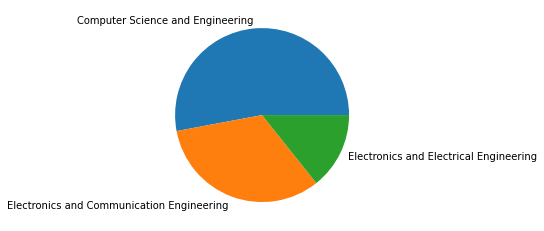

In [106]:
import matplotlib.pyplot as plt

plt.pie(values, labels = labels)

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [107]:
df1 = df.sort_values('CodeKata Score', ascending = False)


In [108]:
toppers = df1.groupby('Department')['Name', 'CodeKata Score', 'Department'].first()

<ipython-input-108-25d10905ac7b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  toppers = df1.groupby('Department')['Name', 'CodeKata Score', 'Department'].first()


In [109]:
toppers

,Name,CodeKata Score,Department
Department,,,
Computer Science and Engineering,A.Dharani,24500,Computer Science and Engineering
Electronics and Communication Engineering,Bodipudi Harini,10040,Electronics and Communication Engineering
Electronics and Electrical Engineering,ASHOK KUMAR K,19400,Electronics and Electrical Engineering


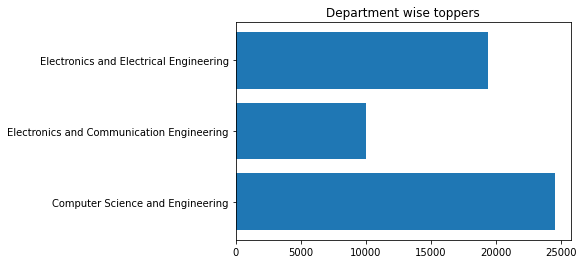

In [110]:
plt.barh(toppers['Department'], toppers['CodeKata Score'])
plt.title('Department wise toppers')
plt.show()